In [1]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [37]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
y_train[0]

9

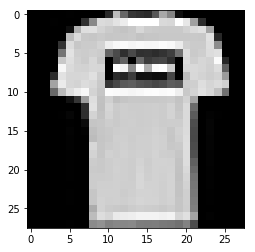

In [40]:
plt.imshow(x_train[1], cmap="gray")

In [41]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [42]:
batch_size = 128
num_classes = 10
epochs = 20

In [43]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [44]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [46]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.5605 - acc: 0.7955 - val_loss: 0.4133 - val_acc: 0.8525
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.4030 - acc: 0.8528 - val_loss: 0.3933 - val_acc: 0.8604
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3682 - acc: 0.8648 - val_loss: 0.3878 - val_acc: 0.8617
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.3473 - acc: 0.8759 - val_loss: 0.3579 - val_acc: 0.8752
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3344 - acc: 0.8792 - val_loss: 0.4054 - val_acc: 0.8596
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3252 - acc: 0.8830 - val_loss: 0.3759 - val_acc: 0.8734
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3203 - acc: 0.8857 - val_loss: 0.3544 - val_acc

In [47]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.3956702790915966)
('Test accuracy:', 0.8731)
